In [106]:
#Load libraries
import os
import pandas as pd
import numpy as np
   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [107]:
telcom=pd.read_csv(r"C:\Users\anupr\Desktop\churn prediction\churn_data.csv")

In [109]:
telcom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
telcom.shape

(7043, 21)

In [69]:
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [70]:
telcom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [71]:
telcom['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [72]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(telcom.isnull().sum())

In [73]:
missing_val

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [74]:
df = telcom.copy()
telcom = df.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c83e2584a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c83e258cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c83e270ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c83e27b588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c83e27b9b0>],
 'means': []}

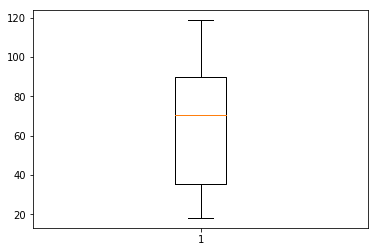

In [75]:
#Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(telcom['MonthlyCharges'])

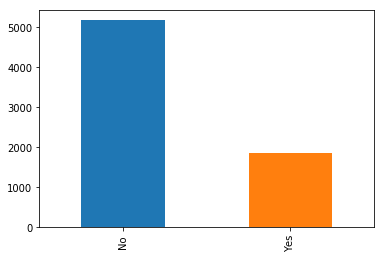

In [21]:
telcom['Churn'].value_counts().plot.bar()

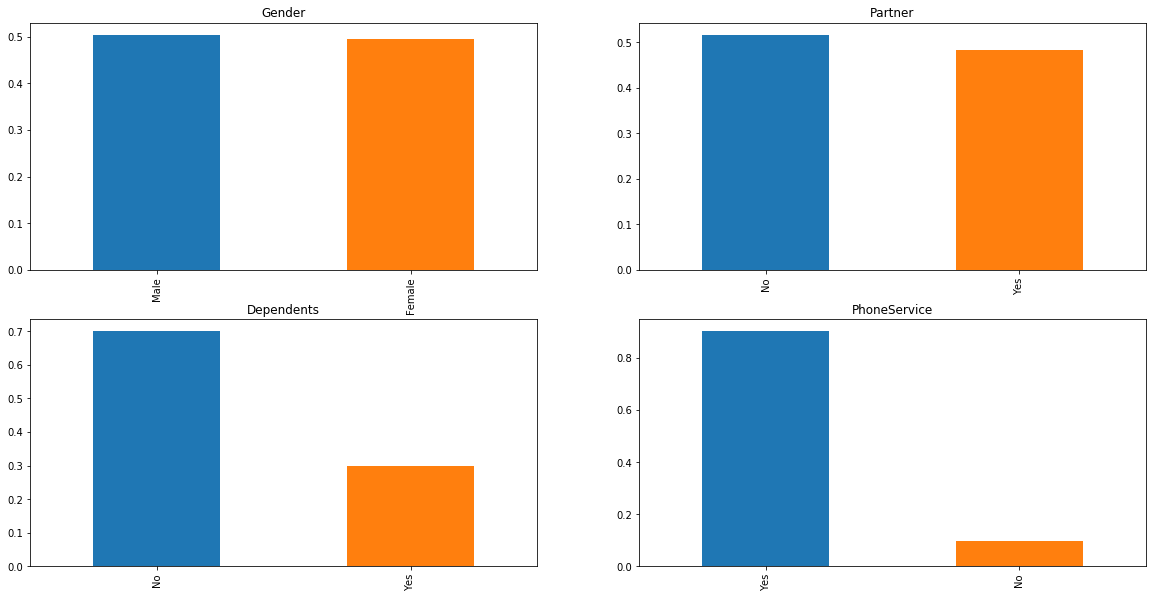

In [26]:
plt.figure(1)
plt.subplot(221)
telcom['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
telcom['Partner'].value_counts(normalize=True).plot.bar(title= 'Partner')

plt.subplot(223)
telcom['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
telcom['PhoneService'].value_counts(normalize=True).plot.bar(title= 'PhoneService')


plt.show()


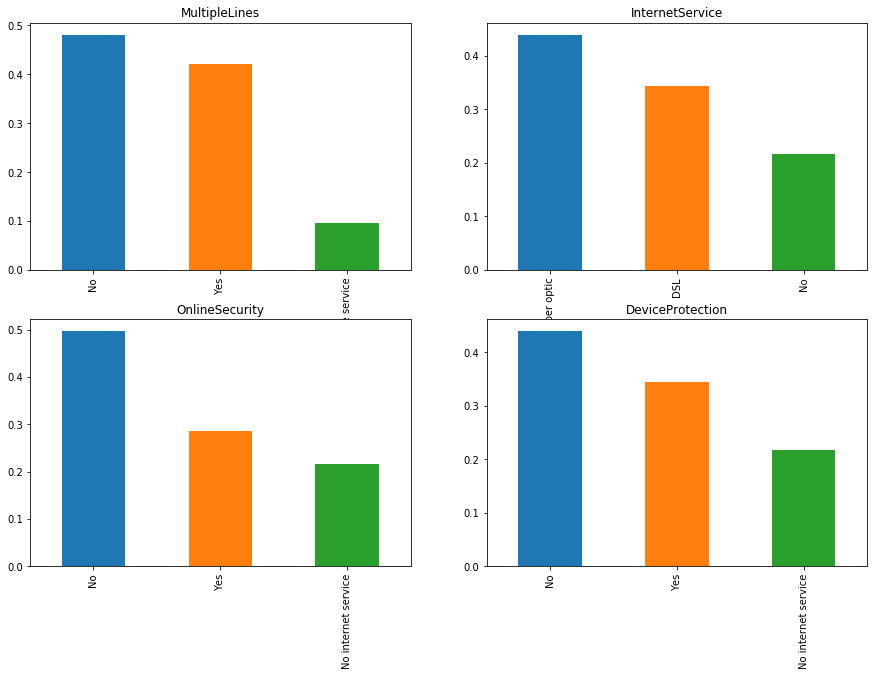

In [76]:
plt.figure(1)
plt.subplot(221)
telcom['MultipleLines'].value_counts(normalize=True).plot.bar(figsize=(15,10),title= 'MultipleLines')

plt.subplot(222)
telcom['InternetService'].value_counts(normalize=True).plot.bar(title= 'InternetService')

plt.subplot(223)
telcom['OnlineSecurity'].value_counts(normalize=True).plot.bar(title= 'OnlineSecurity')

plt.subplot(224)
telcom['DeviceProtection'].value_counts(normalize=True).plot.bar(title= 'DeviceProtection')
plt.show()


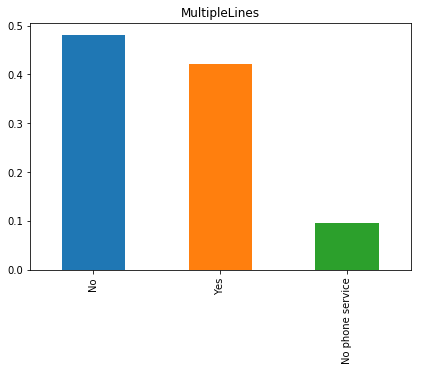

In [35]:
plt.figure(2)
plt.subplot(221)

telcom['MultipleLines'].value_counts(normalize=True).plot.bar(figsize=(15,10),title= 'MultipleLines')

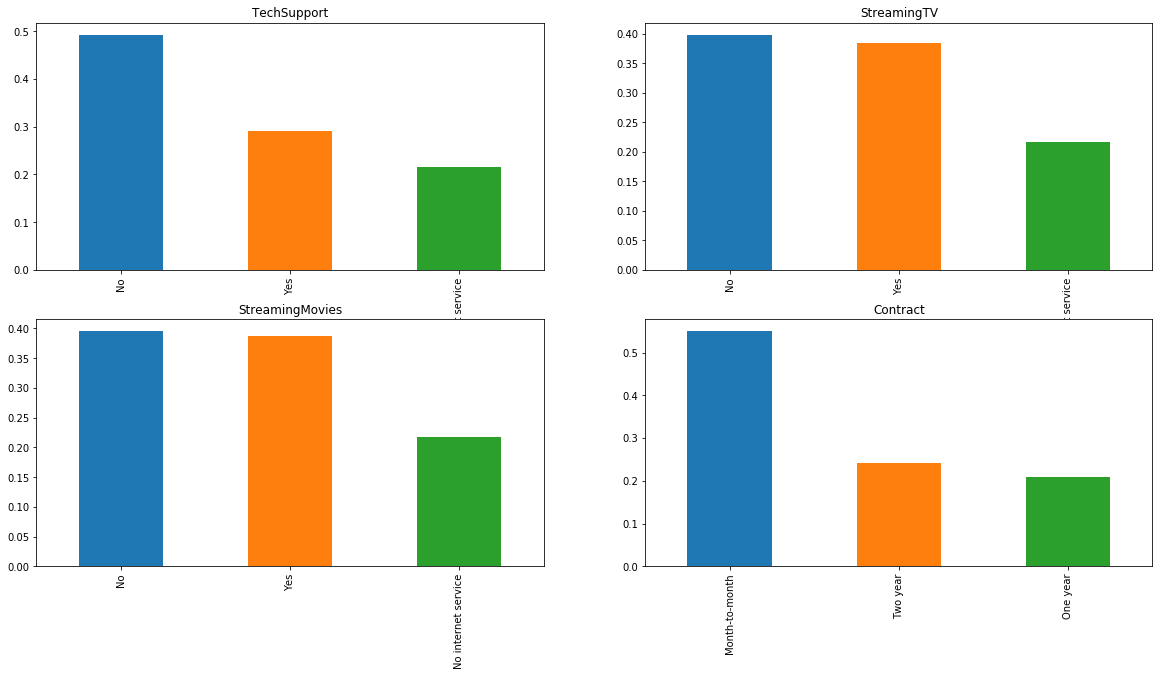

In [77]:
plt.subplot(221)
telcom['TechSupport'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'TechSupport')

plt.subplot(222)
telcom['StreamingTV'].value_counts(normalize=True).plot.bar(title= 'StreamingTV')

plt.subplot(223)
telcom['StreamingMovies'].value_counts(normalize=True).plot.bar(title= 'StreamingMovies')

plt.subplot(224)
telcom['Contract'].value_counts(normalize=True).plot.bar(title= 'Contract')


plt.show()


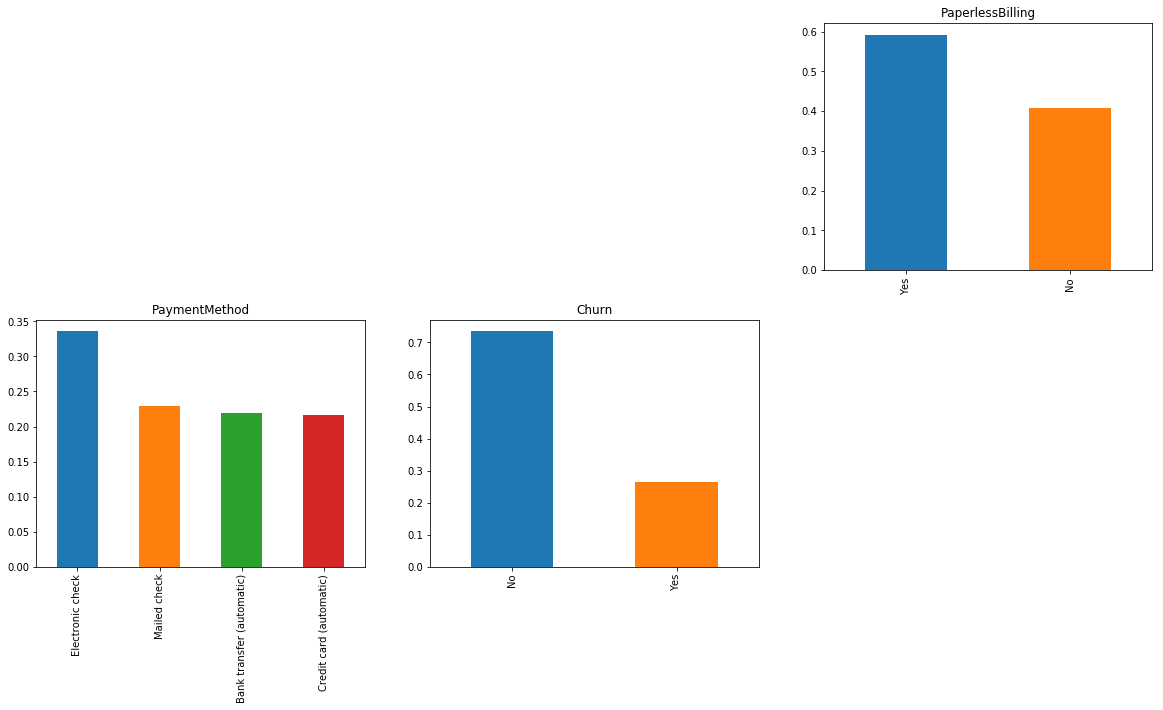

In [37]:
plt.subplot(233)
telcom['PaperlessBilling'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'PaperlessBilling')

plt.subplot(234)
telcom['PaymentMethod'].value_counts(normalize=True).plot.bar(title= 'PaymentMethod')

plt.subplot(235)
telcom['Churn'].value_counts(normalize=True).plot.bar(title= 'Churn')
plt.show()

# Bivariate Analysis

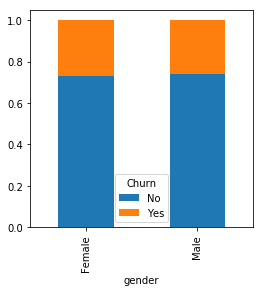

In [78]:
gender=pd.crosstab(telcom['gender'],telcom['Churn'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

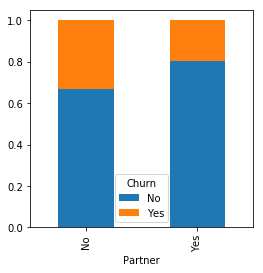

In [79]:
Partner=pd.crosstab(telcom['Partner'],telcom['Churn'])
Partner.div(Partner.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

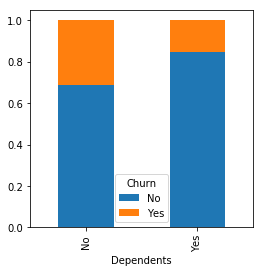

In [80]:
Dependents=pd.crosstab(telcom['Dependents'],telcom['Churn'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

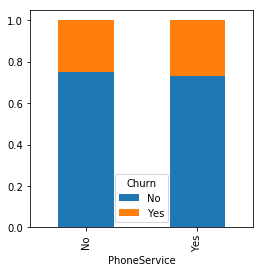

In [41]:
PhoneService=pd.crosstab(telcom['PhoneService'],telcom['Churn'])
PhoneService.div(PhoneService.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

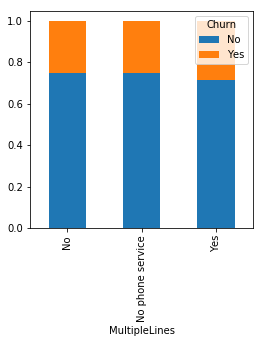

In [81]:
MultipleLines=pd.crosstab(telcom['MultipleLines'],telcom['Churn'])
MultipleLines.div(MultipleLines.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

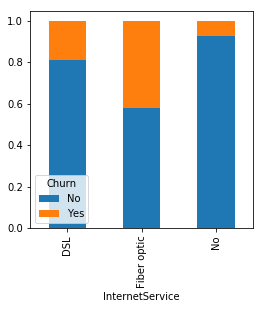

In [82]:
InternetService=pd.crosstab(telcom['InternetService'],telcom['Churn'])
InternetService.div(InternetService.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

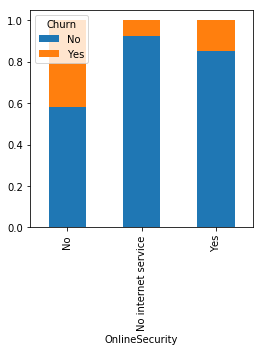

In [44]:
OnlineSecurity=pd.crosstab(telcom['OnlineSecurity'],telcom['Churn'])
OnlineSecurity.div(OnlineSecurity.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

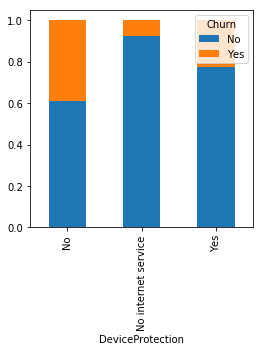

In [46]:
DeviceProtection=pd.crosstab(telcom['DeviceProtection'],telcom['Churn'])
DeviceProtection.div(DeviceProtection.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

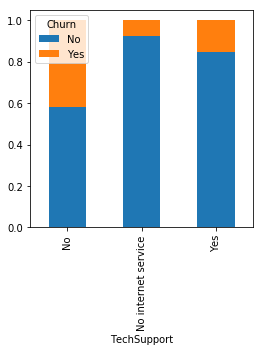

In [47]:
TechSupport=pd.crosstab(telcom['TechSupport'],telcom['Churn'])
TechSupport.div(TechSupport.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

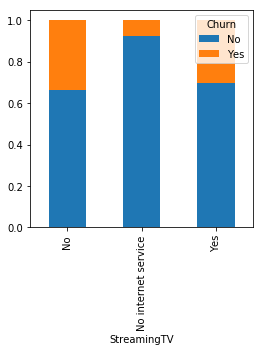

In [49]:
StreamingTV=pd.crosstab(telcom['StreamingTV'],telcom['Churn'])
StreamingTV.div(StreamingTV.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

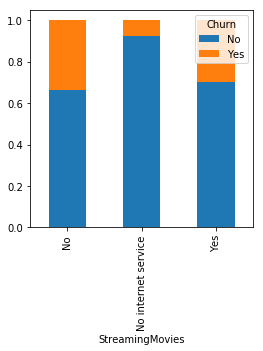

In [50]:
StreamingMovies=pd.crosstab(telcom['StreamingMovies'],telcom['Churn'])
StreamingMovies.div(StreamingMovies.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

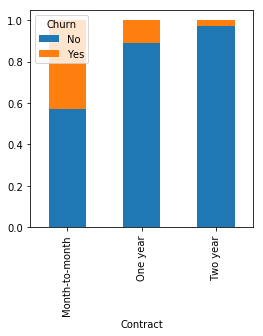

In [51]:
Contract=pd.crosstab(telcom['Contract'],telcom['Churn'])
Contract.div(Contract.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

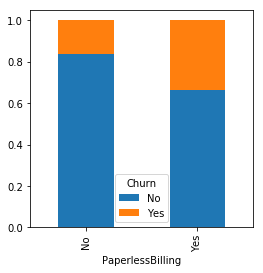

In [98]:
PaperlessBilling=pd.crosstab(telcom['PaperlessBilling'],telcom['Churn'])
PaperlessBilling.div(PaperlessBilling.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

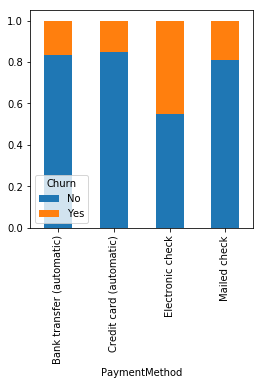

In [99]:
PaymentMethod=pd.crosstab(telcom['PaymentMethod'],telcom['Churn'])
PaymentMethod.div(PaymentMethod.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [113]:
#save catgorical names
cat_names = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']

In [114]:
cat_names

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [116]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(telcom['Churn'], telcom[i]))
    print(p)

gender
0.48657873605618596
Partner
2.1399113440759935e-36
Dependents
4.9249216612154196e-43
PhoneService
0.3387825358066928
MultipleLines
0.0034643829548773
InternetService
9.571788222840544e-160
OnlineSecurity
2.6611496351768565e-185
DeviceProtection
5.505219496457244e-122
TechSupport
1.4430840279999813e-180
StreamingTV
5.528994485739024e-82
StreamingMovies
2.667756755723681e-82
Contract
5.863038300673391e-258
PaperlessBilling
4.073354668665985e-58
PaymentMethod
3.6823546520097993e-140


In [117]:
telcom=telcom.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1)

In [119]:
telcom.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
telcom.shape

(7043, 18)

In [142]:
cname = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [143]:
cname

['tenure', 'MonthlyCharges', 'TotalCharges']

In [144]:
import matplotlib.pyplot as plt


In [145]:
#Correlation plots
df_corr = telcom.loc[:,cname]

In [146]:
df_corr.head(5)

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,29.85
1,0.472222,0.385075,1889.5
2,0.027778,0.354229,108.15
3,0.625000,0.239303,1840.75
4,0.027778,0.521891,151.65


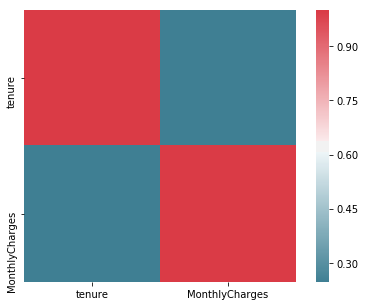

In [147]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [148]:
df = telcom.copy()
telcom = df.copy()

(array([1238.,  497.,  560.,  342.,  394.,  337.,  338.,  286.,  294.,
         251.,  333.,  286.,  344.,  282.,  415.,  846.]),
 array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    ]),
 <a list of 16 Patch objects>)

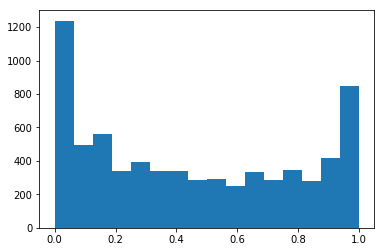

In [151]:
#Normality check
%matplotlib inline  
plt.hist(telcom['tenure'], bins='auto')

In [ ]:
#Normality check
%matplotlib inline  
plt.hist(telcom['MonthlyCharges'], bins='auto')

In [ ]:
#Normality check
%matplotlib inline  
plt.hist(telcom['TotalCharges'], bins='auto')

In [140]:
#Nomalisation
for i in cname:
    print(i)
    telcom[i] = (telcom[i] - min(telcom[i]))/(max(telcom[i]) - min(telcom[i]))

tenure
MonthlyCharges
TotalCharges


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
matrix = telcom.corre()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");